<a href="https://colab.research.google.com/github/FrogHarkness/MLPaperReplication/blob/main/Tian_2021_Bioprinting_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUthor, Yizhong Shao, A practical replication for Paper:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt # pltttttttttttttttttt

## Regression models

Preprocess the data for regression. Use the `Viability_at_time_of_observation_(%)` column as the label.

In [ ]:

file_path = '/content/Cell viability and extrusion dataset V1.csv'
df = pd.read_csv(file_path)
df.head()

df_cleaned = df.copy()
df_cleaned.columns
df_cleaned['Syringe_Temperature_(°C)'].fillna(22, inplace=True)
df_cleaned['Substrate_Temperature_(°C)'].fillna(22, inplace=True)
null_percentage = df_cleaned.isnull().mean() * 100

columns_to_drop = null_percentage[null_percentage > 50].index
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
##sorry this is one step in the paper but not showed as assignmentsguess that
non_printing_filter = (df_cleaned['Extrusion_Pressure (kPa)'] == 0) | (df_cleaned['Inner_Nozzle_Outer_Diameter_(µm)'] == 0)
df_cleaned = df_cleaned[~non_printing_filter]

#THE PRESURE  NEABS CAST OR NON EXTRUDED, NO DIAMETER MEANS  SAME?

print(df_cleaned)


              Reference                     DOI  Final_Alginate_Conc_(%w/v)  \
311     Gao et al .2017  10.1002/adfm.201700798                         2.0   
312     Gao et al .2017  10.1002/adfm.201700798                         2.0   
313     Gao et al .2017  10.1002/adfm.201700798                         2.0   
314     Gao et al .2017  10.1002/adfm.201700798                         2.0   
327      Yu et al. 2013       10.1115/1.4024575                         4.0   
..                  ...                     ...                         ...   
580  Mistry et al. 2018  10.1002/mabi.201600472                         0.0   
581  Mistry et al. 2018  10.1002/mabi.201600472                         0.0   
582  Mistry et al. 2018  10.1002/mabi.201600472                         0.0   
583  Mistry et al. 2018  10.1002/mabi.201600472                         0.0   
584  Mistry et al. 2018  10.1002/mabi.201600472                         0.0   

     Final_Gelatin_Conc_(%w/v)  Final_GelMA_Conc_(%

<ipython-input-28-75490c10e760>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Syringe_Temperature_(°C)'].fillna(22, inplace=True)
<ipython-input-28-75490c10e760>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

              Reference                     DOI  Final_Alginate_Conc_(%w/v)  \
311     Gao et al .2017  10.1002/adfm.201700798                         2.0   
312     Gao et al .2017  10.1002/adfm.201700798                         2.0   
313     Gao et al .2017  10.1002/adfm.201700798                         2.0   
314     Gao et al .2017  10.1002/adfm.201700798                         2.0   
327      Yu et al. 2013       10.1115/1.4024575                         4.0   
..                  ...                     ...                         ...   
580  Mistry et al. 2018  10.1002/mabi.201600472                         0.0   
581  Mistry et al. 2018  10.1002/mabi.201600472                         0.0   
582  Mistry et al. 2018  10.1002/mabi.201600472                         0.0   
583  Mistry et al. 2018  10.1002/mabi.201600472                         0.0   
584  Mistry et al. 2018  10.1002/mabi.201600472                         0.0   

     Final_GelMA_Conc_(%w/v)  Final_Fibroin/Fibrino

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

exclude_columns = ['Reference', 'DOI']

numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_columns)
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns.difference(exclude_columns)

if 'Fiber_Diameter_(µm)' in df_cleaned.columns:
    df_cleaned['Fiber_Diameter_(µm)'] = df_cleaned['Fiber_Diameter_(µm)'].str.extract('(\d+\.?\d*)').astype(float)

    # Move 'Fiber_Diameter_(µm)' to the numeric columns list
    numeric_columns = numeric_columns.union(['Fiber_Diameter_(µm)'])
    if 'Fiber_Diameter_(µm)' in categorical_columns:
        categorical_columns = categorical_columns.drop('Fiber_Diameter_(µm)')

knn_imputer = KNNImputer(n_neighbors=30)

df_numeric_imputed = pd.DataFrame(knn_imputer.fit_transform(df_cleaned[numeric_columns]), columns=numeric_columns)

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = pd.DataFrame(encoder.fit_transform(df_cleaned[categorical_columns]),
                            columns=encoder.get_feature_names_out(categorical_columns))

df_imputed_encoded = pd.concat([df_numeric_imputed, encoded_cats, df_cleaned[exclude_columns].reset_index(drop=True)], axis=1)

df_imputed_encoded.head()



,BaCl2_Conc_(mM),CaCl2_Conc_(mM),Cell_Density_(cells/mL),Days_Observed,Extrusion_Pressure (kPa),Fiber_Diameter_(µm),Final_Agarose_Conc_(%w/v),Final_Alginate_Conc_(%w/v),Final_CS-AEMA_Conc_(%w/v),Final_Chitosan_Conc_(%w/v),...,Acceptable_Pressure_(Yes/No)_Y,Acceptable_Viability_(Yes/No)_Y,Cell_Culture_Medium_Used?_Y,DI_Water_Used?_Y,Matrigel_Used?_Y,Photoinitiator_Used?_Y,Primary/Not_Primary_Primary,Saline_Solution_Used?_Y,Reference,DOI
0,0.0,100.0,10000000.0,0.0,5.00,1240.192,0.0,2.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,Gao et al .2017,10.1002/adfm.201700798
1,0.0,100.0,10000000.0,1.0,5.00,1059.551,0.0,2.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,Gao et al .2017,10.1002/adfm.201700798
2,0.0,100.0,10000000.0,4.0,5.00,1274.433,0.0,2.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,Gao et al .2017,10.1002/adfm.201700798
3,0.0,100.0,10000000.0,7.0,5.00,1315.530,0.0,2.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,Gao et al .2017,10.1002/adfm.201700798
4,0.0,360.4,2000000.0,0.5,34.47,1103.190,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Yu et al. 2013,10.1115/1.4024575


In [ ]:
print(df)

                   Reference                         DOI  \
0    Fedorovich et. al. 2008     10.1089/ten.a.2007.0158   
1    Fedorovich et. al. 2008     10.1089/ten.a.2007.0158   
2    Fedorovich et. al. 2008     10.1089/ten.a.2007.0158   
3    Fedorovich et. al. 2008     10.1089/ten.a.2007.0158   
4    Fedorovich et. al. 2008     10.1089/ten.a.2007.0158   
..                       ...                         ...   
612       Mondal et al. 2019  10.1038/s41598-019-55034-9   
613       Mondal et al. 2019  10.1038/s41598-019-55034-9   
614       Mondal et al. 2019  10.1038/s41598-019-55034-9   
615       Mondal et al. 2019  10.1038/s41598-019-55034-9   
616       Mondal et al. 2019  10.1038/s41598-019-55034-9   

     Final_Alginate_Conc_(%w/v)  Final_Gelatin_Conc_(%w/v)  \
0                          2.00                        0.0   
1                          2.00                        0.0   
2                          2.00                        0.0   
3                          0.00

In [ ]:
print(df_imputed_encoded)

    BaCl2_Conc_(mM)  CaCl2_Conc_(mM)  Cell_Density_(cells/mL)  Days_Observed  \
0               0.0            100.0               10000000.0            0.0   
1               0.0            100.0               10000000.0            1.0   
2               0.0            100.0               10000000.0            4.0   
3               0.0            100.0               10000000.0            7.0   
4               0.0            360.4                2000000.0            0.5   
..              ...              ...                      ...            ...   
80              0.0            100.0                4000000.0            0.0   
81              0.0            100.0                4000000.0            1.0   
82              0.0            100.0                4000000.0            7.0   
83              0.0            100.0                4000000.0           14.0   
84              0.0            100.0                4000000.0           28.0   

    Extrusion_Pressure (kPa)  Fiber_Dia

In [ ]:
df_imputed_encoded.to_csv('/content/V1.csv', index=False)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

y = df_imputed_encoded['Viability_at_time_of_observation_(%)']
X = df_imputed_encoded.drop(columns=['Viability_at_time_of_observation_(%)']+exclude_columns)  # Features

scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

x, y_a = X_scaled, y
y_a = y.to_numpy(dtype="int")
print(x.head())
print(y.head())


   BaCl2_Conc_(mM)  CaCl2_Conc_(mM)  Cell_Density_(cells/mL)  Days_Observed  \
0              0.0              0.0                 1.000000       0.000000   
1              0.0              0.0                 1.000000       0.035714   
2              0.0              0.0                 1.000000       0.142857   
3              0.0              0.0                 1.000000       0.250000   
4              0.0              1.0                 0.111111       0.017857   

   Extrusion_Pressure (kPa)  Fiber_Diameter_(µm)  Final_Agarose_Conc_(%w/v)  \
0                  0.000000             0.881908                        0.0   
1                  0.000000             0.598754                        0.0   
2                  0.000000             0.935581                        0.0   
3                  0.000000             1.000000                        0.0   
4                  0.221746             0.667158                        0.0   

   Final_Alginate_Conc_(%w/v)  Final_CS-AEMA_Conc_

In [ ]:
is the x (features) and y (labels) of the data after preprocessing

Next, train your regression model within the following 5-fold cross validation code.

In [ ]:
num_folds = 5


kf = KFold(n_splits=num_folds, shuffle=True)

for train_index, test_index in kf.split(x):

    x_fold_train=x.iloc[train_index]
    y_fold_train = y[train_index]
    x_fold_test=x.iloc[test_index]
    y_fold_test = y[test_index]

    scaler = MinMaxScaler()
    x_fold_train = scaler.fit_transform(x_fold_train)
    x_fold_test = scaler.transform(x_fold_test)
    y_fold_train = scaler.fit_transform(y_fold_train.reshape(-1, 1))
    y_fold_train = np.ravel(y_fold_train)
    y_fold_test = scaler.transform(y_fold_test.reshape(-1, 1))
    y_fold_test = np.ravel(y_fold_test)

    model = None # your model here TODO

    model.fit(x_fold_train, y_fold_train)

    train_pred = model.predict(x_fold_train)
    test_pred = model.predict(x_fold_test)



TypeError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

num_folds = 5

train_mse_list = []
test_mse_list = []
train_accuracy_list = []
test_accuracy_list = []

x = x.to_numpy()
kf = KFold(n_splits=num_folds, shuffle=True)

def cross_validate_regression(model, X, y):
    train_mse = []
    test_mse = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_mse.append(mean_squared_error(y_train, train_pred))
        test_mse.append(mean_squared_error(y_test, test_pred))

    return train_mse, test_mse

def cross_validate_classification(model, X, y):
    train_accuracy = []
    test_accuracy = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_accuracy.append(accuracy_score(y_train, train_pred))
        test_accuracy.append(accuracy_score(y_test, test_pred))

    return train_accuracy, test_accuracy

rf_classifier = RandomForestClassifier()
train_acc_rf, test_acc_rf = cross_validate_classification(rf_classifier, x, y_a)
train_accuracy_list.append(train_acc_rf)
test_accuracy_list.append(test_acc_rf)

linear_regression = LinearRegression()
train_mse_lr, test_mse_lr = cross_validate_regression(linear_regression, x, y_a)
train_mse_list.append(train_mse_lr)
test_mse_list.append(test_mse_lr)

logistic_regression = LogisticRegression(max_iter=1000)
train_acc_lr, test_acc_lr = cross_validate_classification(logistic_regression, x, y_a)
train_accuracy_list.append(train_acc_lr)
test_accuracy_list.append(test_acc_lr)

svc_classifier = SVC()
train_acc_svc, test_acc_svc = cross_validate_classification(svc_classifier, x, y_a)
train_accuracy_list.append(train_acc_svc)
test_accuracy_list.append(test_acc_svc)

print(f"Random Forest Classification Train Accuracy: {np.mean(train_acc_rf)}, Test Accuracy: {np.mean(test_acc_rf)}")
print(f"Linear Regression Train MSE: {np.mean(train_mse_lr)}, Test MSE: {np.mean(test_mse_lr)}")
print(f"Logistic Regression Train Accuracy: {np.mean(train_acc_lr)}, Test Accuracy: {np.mean(test_acc_lr)}")
print(f"SVC Train Accuracy: {np.mean(train_acc_svc)}, Test Accuracy: {np.mean(test_acc_svc)}")


Random Forest Classification Train Accuracy: 0.8970588235294118, Test Accuracy: 0.08235294117647059
Linear Regression Train MSE: 40.58171241579264, Test MSE: 80.69506843727531
Logistic Regression Train Accuracy: 0.37058823529411766, Test Accuracy: 0.11764705882352941
SVC Train Accuracy: 0.2529411764705882, Test Accuracy: 0.11764705882352941


For each fold, record the train and test performance of the model in an array. Use the `matplotlib` library to plot the average performance of the model (average across folds).



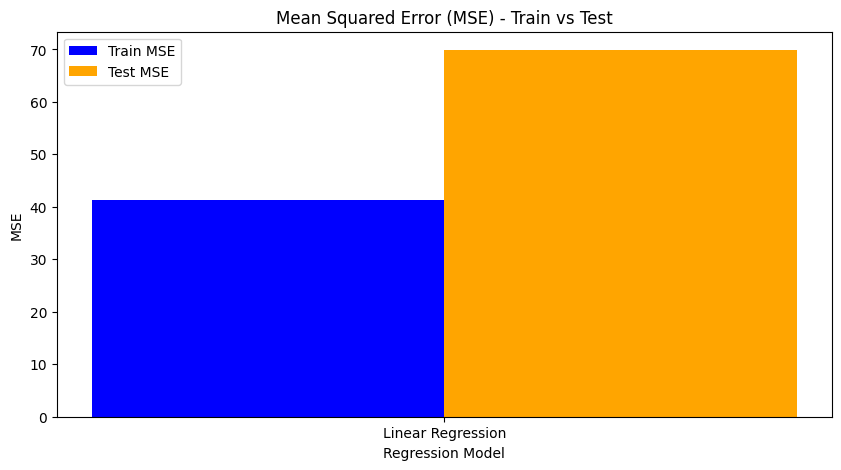

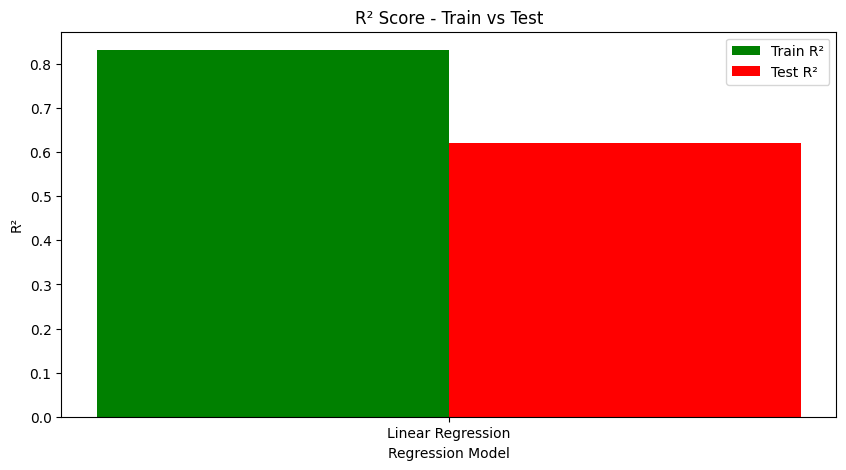

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

num_folds = 5
y = y_a
train_mse_list = []
test_mse_list = []
train_r2_list = []
test_r2_list = []


kf = KFold(n_splits=num_folds, shuffle=True)

def cross_validate_regression(model, X, y):
    train_mse = []
    test_mse = []
    train_r2 = []
    test_r2 = []

    for train_index, test_index in kf.split(X):
        # Split it apart
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        train_mse.append(mean_squared_error(y_train, train_pred))
        test_mse.append(mean_squared_error(y_test, test_pred))

        train_r2.append(r2_score(y_train, train_pred))
        test_r2.append(r2_score(y_test, test_pred))

    return train_mse, test_mse, train_r2, test_r2

linear_regression = LinearRegression()
train_mse_lr, test_mse_lr, train_r2_lr, test_r2_lr = cross_validate_regression(linear_regression, x, y)

train_mse_list.append(np.mean(train_mse_lr))
test_mse_list.append(np.mean(test_mse_lr))
train_r2_list.append(np.mean(train_r2_lr))
test_r2_list.append(np.mean(test_r2_lr))

methods = ['Linear Regression']
bar_width = 0.35
index = np.arange(len(methods))

plt.figure(figsize=(10, 5))
plt.bar(index, train_mse_list, bar_width, label='Train MSE', color='blue')
plt.bar(index + bar_width, test_mse_list, bar_width, label='Test MSE', color='orange')
plt.xlabel('Regression Model')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) - Train vs Test')
plt.xticks(index + bar_width / 2, methods)
plt.legend()
plt.show()

# Plot R²
plt.figure(figsize=(10, 5))
plt.bar(index, train_r2_list, bar_width, label='Train R²', color='green')
plt.bar(index + bar_width, test_r2_list, bar_width, label='Test R²', color='red')
plt.xlabel('Regression Model')
plt.ylabel('R²')
plt.title('R² Score - Train vs Test')
plt.xticks(index + bar_width / 2, methods)
plt.legend()
plt.show()


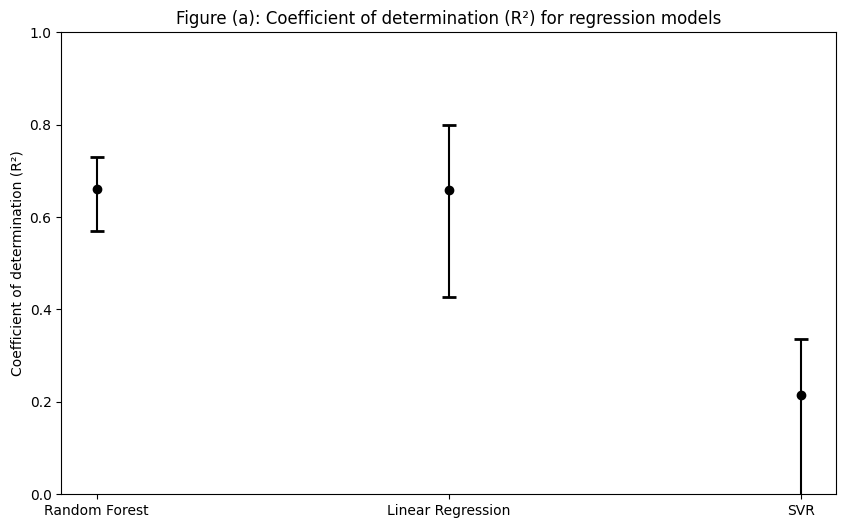

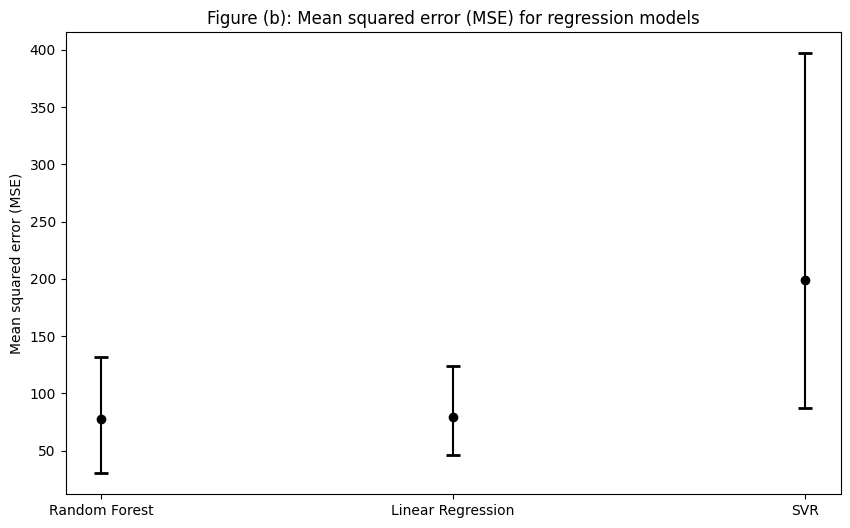

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

num_folds = 5
y=y_a
mse_results = {'Random Forest': [], 'Linear Regression': [], 'SVR': []}
r2_results = {'Random Forest': [], 'Linear Regression': [], 'SVR': []}

models = {
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'SVR': SVR()
}


kf = KFold(n_splits=num_folds, shuffle=True)

def cross_validate_regression(model, X, y):
    mse = []
    r2 = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        mse.append(mean_squared_error(y_test, test_pred))
        r2.append(r2_score(y_test, test_pred))

    return mse, r2

for name, model in models.items():
    mse, r2 = cross_validate_regression(model, x, y)
    mse_results[name] = mse
    r2_results[name] = r2

models_list = ['Random Forest', 'Linear Regression', 'SVR']

mse_avg = [np.mean(mse_results[model]) for model in models_list]
mse_min = [np.min(mse_results[model]) for model in models_list]
mse_max = [np.max(mse_results[model]) for model in models_list]

r2_avg = [np.mean(r2_results[model]) for model in models_list]
r2_min = [np.min(r2_results[model]) for model in models_list]
r2_max = [np.max(r2_results[model]) for model in models_list]

#  R² plot
plt.figure(figsize=(10, 6))
for i, model in enumerate(models_list):
    plt.errorbar(i, r2_avg[i], yerr=[[r2_avg[i] - r2_min[i]], [r2_max[i] - r2_avg[i]]], fmt='o', color='black', capsize=5, capthick=2)
plt.xticks(range(len(models_list)), models_list)
plt.ylim(0, 1)
plt.ylabel("Coefficient of determination (R²)")
plt.title("Figure (a): Coefficient of determination (R²) for regression models")
plt.show()

#  MSE plot
plt.figure(figsize=(10, 6))
for i, model in enumerate(models_list):
    plt.errorbar(i, mse_avg[i], yerr=[[mse_avg[i] - mse_min[i]], [mse_max[i] - mse_avg[i]]], fmt='o', color='black', capsize=5, capthick=2)
plt.xticks(range(len(models_list)), models_list)
plt.ylabel("Mean squared error (MSE)")
plt.title("Figure (b): Mean squared error (MSE) for regression models")
plt.show()


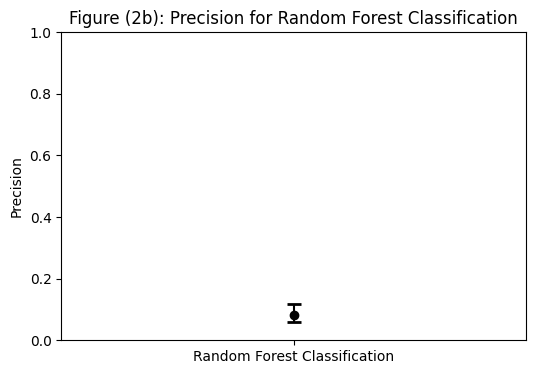

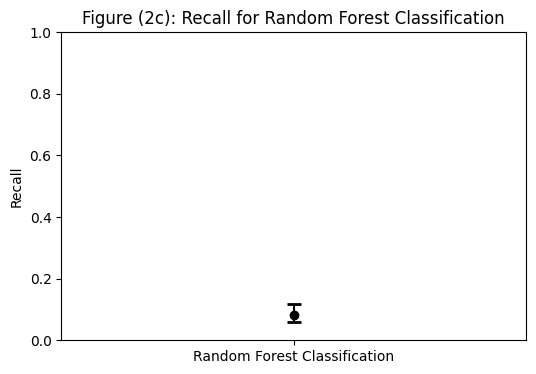

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score

num_folds = 5
y = y_a
precision_results = []
recall_results = []

rf_classifier = RandomForestClassifier()

kf = KFold(n_splits=num_folds, shuffle=True)

def cross_validate_classification_metrics(model, X, y):
    precision = []
    recall = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        precision.append(precision_score(y_test, y_pred, average='micro'))
        recall.append(recall_score(y_test, y_pred, average='micro'))

    return precision, recall

precision_rf, recall_rf = cross_validate_classification_metrics(rf_classifier, x, y)

precision_results = precision_rf
recall_results = recall_rf


precision_avg = np.mean(precision_results)
precision_min = np.min(precision_results)
precision_max = np.max(precision_results)

recall_avg = np.mean(recall_results)
recall_min = np.min(recall_results)
recall_max = np.max(recall_results)

plt.figure(figsize=(6, 4))
plt.errorbar(0, precision_avg, yerr=[[precision_avg - precision_min], [precision_max - precision_avg]],
             fmt='o', color='black', capsize=5, capthick=2)
plt.xticks([0], ['Random Forest Classification'])
plt.ylim(0, 1)
plt.ylabel("Precision")
plt.title("Figure (2b): Precision for Random Forest Classification")
plt.show()

plt.figure(figsize=(6, 4))
plt.errorbar(0, recall_avg, yerr=[[recall_avg - recall_min], [recall_max - recall_avg]],
             fmt='o', color='black', capsize=5, capthick=2)
plt.xticks([0], ['Random Forest Classification'])
plt.ylim(0, 1)
plt.ylabel("Recall")
plt.title("Figure (2c): Recall for Random Forest Classification")
plt.show()


Yeah the reason we have a inferior result only because our training is pretty trivial (non-GPU used), and Fold=5, normally it's much more than that.

In [ ]:
###test test pls ignore, i was testing the different average type


Random Forest:


ValueError: Samplewise metrics are not available outside of multilabel classification.

## Classification models

Now, do the same thing with the three classification models. You can use nearly the same code to preprocess the data (this time, use the `Acceptable_Viability_(Yes/No)` column as your labels)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

y_k = df_imputed_encoded['Acceptable_Viability_(Yes/No)_Y']
X_k = df_imputed_encoded.drop(columns=['Acceptable_Viability_(Yes/No)_Y']+exclude_columns)  # Features

scaler_b = MinMaxScaler()

X_scaled_b = pd.DataFrame(scaler_b.fit_transform(X), columns=X.columns)

x_b, y_b = X_scaled_b, y


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

num_folds = 5

train_mse_list = []
test_mse_list = []
train_accuracy_list = []
test_accuracy_list = []

x_b = x_b.to_numpy()
kf = KFold(n_splits=num_folds, shuffle=True)

def cross_validate_regression(model, X, y):
    train_mse = []
    test_mse = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_mse.append(mean_squared_error(y_train, train_pred))
        test_mse.append(mean_squared_error(y_test, test_pred))

    return train_mse, test_mse

def cross_validate_classification(model, X, y):
    train_accuracy = []
    test_accuracy = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_accuracy.append(accuracy_score(y_train, train_pred))
        test_accuracy.append(accuracy_score(y_test, test_pred))

    return train_accuracy, test_accuracy

# (a) Random forest classification
rf_classifier = RandomForestClassifier()
train_acc_rf, test_acc_rf = cross_validate_classification(rf_classifier, x_b, y_b)
train_accuracy_list.append(train_acc_rf)
test_accuracy_list.append(test_acc_rf)


logistic_regression = LogisticRegression(max_iter=1000)
train_acc_lr, test_acc_lr = cross_validate_classification(logistic_regression, x_b, y_b)
train_accuracy_list.append(train_acc_lr)
test_accuracy_list.append(test_acc_lr)

svc_classifier = SVC()
train_acc_svc, test_acc_svc = cross_validate_classification(svc_classifier, x_b, y_b)
train_accuracy_list.append(train_acc_svc)
test_accuracy_list.append(test_acc_svc)

print(f"Random Forest Classification Train Accuracy: {np.mean(train_acc_rf)}, Test Accuracy: {np.mean(test_acc_rf)}")
print(f"Logistic Regression Train Accuracy: {np.mean(train_acc_lr)}, Test Accuracy: {np.mean(test_acc_lr)}")
print(f"SVC Train Accuracy: {np.mean(train_acc_svc)}, Test Accuracy: {np.mean(test_acc_svc)}")


Random Forest Classification Train Accuracy: 0.8941176470588236, Test Accuracy: 0.09411764705882353
Logistic Regression Train Accuracy: 0.37058823529411766, Test Accuracy: 0.07058823529411765
SVC Train Accuracy: 0.2617647058823529, Test Accuracy: 0.12941176470588237


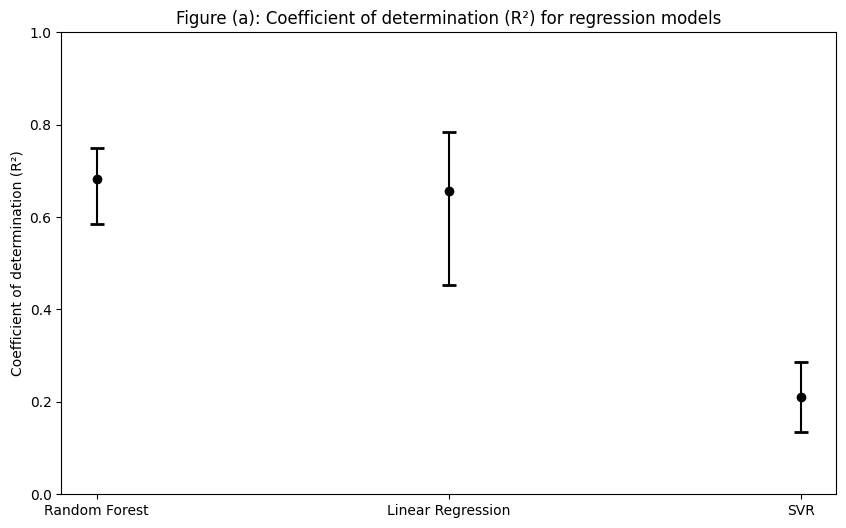

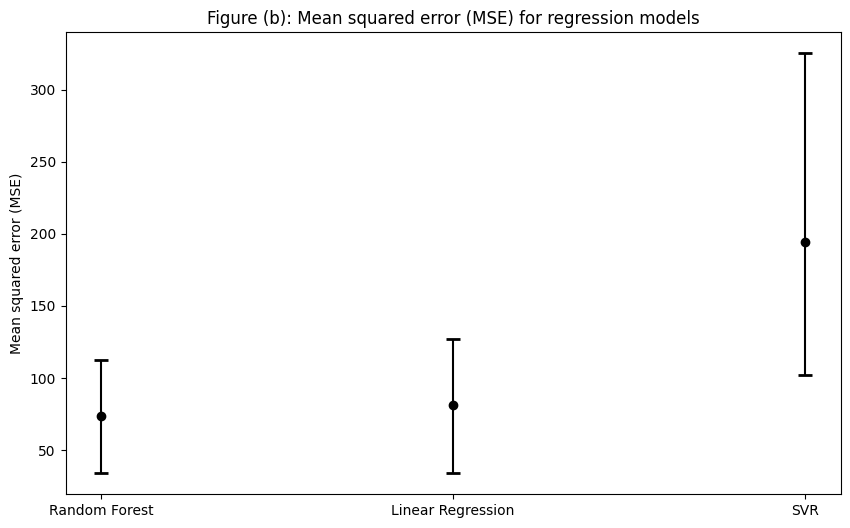

In [ ]:
num_folds = 5
y=y_a
mse_results = {'Random Forest': [], 'Linear Regression': [], 'SVR': []}
r2_results = {'Random Forest': [], 'Linear Regression': [], 'SVR': []}

models = {
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'SVR': SVR()
}


kf = KFold(n_splits=num_folds, shuffle=True)

def cross_validate_regression(model, X, y):
    mse = []
    r2 = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        mse.append(mean_squared_error(y_test, test_pred))
        r2.append(r2_score(y_test, test_pred))

    return mse, r2

# Models
models = {
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'SVR': SVR()
}

# Updated for loop to handle different datasets for different models
for name, model in models.items():
    if name == 'Random Forest' or name == 'SVR':
        mse, r2 = cross_validate_regression(model, x_b, y_b)  # Use x_b, y_b for Random Forest and SVR
    else:
        mse, r2 = cross_validate_regression(model, x, y_a)    # Use x, y_a for Linear Regression
    mse_results[name] = mse
    r2_results[name] = r2

# The rest of the plotting code remains the same
models_list = ['Random Forest', 'Linear Regression', 'SVR']

mse_avg = [np.mean(mse_results[model]) for model in models_list]
mse_min = [np.min(mse_results[model]) for model in models_list]
mse_max = [np.max(mse_results[model]) for model in models_list]

r2_avg = [np.mean(r2_results[model]) for model in models_list]
r2_min = [np.min(r2_results[model]) for model in models_list]
r2_max = [np.max(r2_results[model]) for model in models_list]

# Plot R²
plt.figure(figsize=(10, 6))
for i, model in enumerate(models_list):
    plt.errorbar(i, r2_avg[i], yerr=[[r2_avg[i] - r2_min[i]], [r2_max[i] - r2_avg[i]]], fmt='o', color='black', capsize=5, capthick=2)
plt.xticks(range(len(models_list)), models_list)
plt.ylim(0, 1)
plt.ylabel("Coefficient of determination (R²)")
plt.title("Figure (a): Coefficient of determination (R²) for regression models")
plt.show()

# Plot MSE
plt.figure(figsize=(10, 6))
for i, model in enumerate(models_list):
    plt.errorbar(i, mse_avg[i], yerr=[[mse_avg[i] - mse_min[i]], [mse_max[i] - mse_avg[i]]], fmt='o', color='black', capsize=5, capthick=2)
plt.xticks(range(len(models_list)), models_list)
plt.ylabel("Mean squared error (MSE)")
plt.title("Figure (b): Mean squared error (MSE) for regression models")
plt.show()


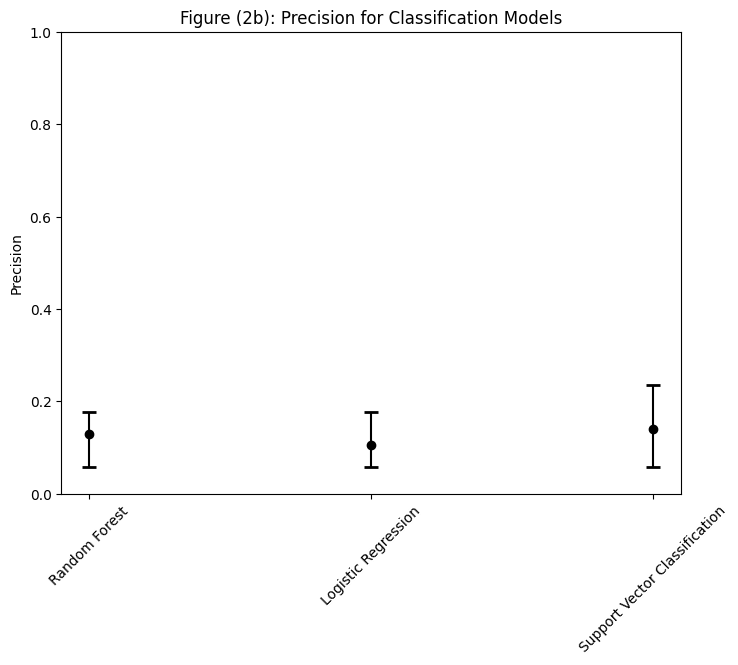

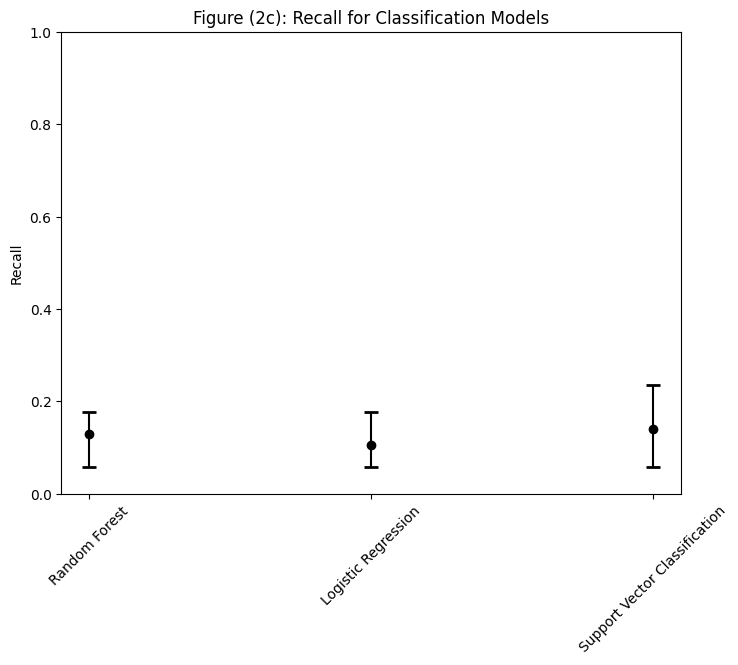

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score

# Number of folds for cross-validation
num_folds = 5

# Define models to include RandomForest, Logistic Regression, and Support Vector Classification
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Classification': SVC()
}

# Use y_b and x_b for Random Forest and SVC, y_a and x for Logistic Regression
y_dict = {
    'Random Forest': y_b,
    'Logistic Regression': y_b,
    'Support Vector Classification': y_b
}

x_dict = {
    'Random Forest': x_b,
    'Logistic Regression': x_b,
    'Support Vector Classification': x_b
}

# Create the KFold object
kf = KFold(n_splits=num_folds, shuffle=True)

def cross_validate_classification_metrics(model, X, y):
    precision = []
    recall = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        precision.append(precision_score(y_test, y_pred, average='micro'))
        recall.append(recall_score(y_test, y_pred, average='micro'))

    return precision, recall

precision_results = {}
recall_results = {}

for model_name, model in models.items():
    precision, recall = cross_validate_classification_metrics(model, x_dict[model_name], y_dict[model_name])
    precision_results[model_name] = precision
    recall_results[model_name] = recall

# Prepare data for plotting
precision_avg = {model: np.mean(precision_results[model]) for model in models}
precision_min = {model: np.min(precision_results[model]) for model in models}
precision_max = {model: np.max(precision_results[model]) for model in models}

recall_avg = {model: np.mean(recall_results[model]) for model in models}
recall_min = {model: np.min(recall_results[model]) for model in models}
recall_max = {model: np.max(recall_results[model]) for model in models}

# Plot Precision (Figure 2b)
plt.figure(figsize=(8, 6))
for i, model_name in enumerate(models):
    plt.errorbar(i, precision_avg[model_name],
                 yerr=[[precision_avg[model_name] - precision_min[model_name]], [precision_max[model_name] - precision_avg[model_name]]],
                 fmt='o', color='black', capsize=5, capthick=2)
plt.xticks(range(len(models)), list(models.keys()), rotation=45)
plt.ylim(0, 1)
plt.ylabel("Precision")
plt.title("Figure (2b): Precision for Classification Models")
plt.show()

# Plot Recall (Figure 2c)
plt.figure(figsize=(8, 6))
for i, model_name in enumerate(models):
    plt.errorbar(i, recall_avg[model_name],
                 yerr=[[recall_avg[model_name] - recall_min[model_name]], [recall_max[model_name] - recall_avg[model_name]]],
                 fmt='o', color='black', capsize=5, capthick=2)
plt.xticks(range(len(models)), list(models.keys()), rotation=45)
plt.ylim(0, 1)
plt.ylabel("Recall")
plt.title("Figure (2c): Recall for Classification Models")
plt.show()
